In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from collections import Counter
from sklearn.metrics import mean_squared_error
from pandas import concat

pd.set_option('display.max_columns', 50)

#import in the bird strikes data set and look at the first 5 rows of data, thousands=',' will convert strings with commas (currency) to numeric
bird_strikes=pd.read_csv("../input/Bird Strikes Test.csv", low_memory=False, thousands=',')
bird_strikes.head()


# Any results you write to the current directory are saved as output.

,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Impact to flight,FlightDate,Record ID,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Wildlife: Size,Wildlife: Species,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
0,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,A-319,NaN,1/1/2005 0:00,227413,No damage,2,NORTHWEST AIRLINES,Michigan,Climb,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0,0,0,NaN,400.0,NaN
1,DANE COUNTY REGIONAL ARPT-TRUAX FLD,< 1000 ft,A-320,NaN,1/1/2005 0:00,226578,No damage,2,NORTHWEST AIRLINES,Wisconsin,Take-off run,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN
2,HOGUE ARPT,< 1000 ft,PA-46 MALIBU,NaN,1/1/2005 0:00,268383,Caused damage,1,PRIVATELY OWNED,Tennessee,Landing Roll,Large,White-tailed deer,NaN,Day,NaN,NaN,0,0,0,0.0,0.0,20.0
3,SACRAMENTO INTL,< 1000 ft,B-737-300,None,1/1/2005 0:00,229514,Caused damage,2,SOUTHWEST AIRLINES,California,Approach,Large,Greater white-fronted goose,2140.0,Night,Y,NaN,0,117135,117135,NaN,500.0,142.0
4,GUARULHOS INTL,< 1000 ft,B-767-300,NaN,1/1/2005 0:00,225661,No damage,2,UNITED AIRLINES,NaN,Landing Roll,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN


In [2]:
#Looking at the variables and data types in the data set
bird_strikes.dtypes

Airport: Name                                  object
Altitude bin                                   object
Aircraft: Make/Model                           object
Effect: Impact to flight                       object
FlightDate                                     object
Record ID                                       int64
Effect: Indicated Damage                       object
Aircraft: Number of engines?                   object
Aircraft: Airline/Operator                     object
Origin State                                   object
When: Phase of flight                          object
Wildlife: Size                                 object
Wildlife: Species                              object
When: Time (HHMM)                             float64
When: Time of day                              object
Pilot warned of birds or wildlife?             object
Cost: Aircraft time out of service (hours)    float64
Cost: Other (inflation adj)                     int64
Cost: Repair (inflation adj)

In [3]:
#Convert variable types and creating additional date variables
bird_strikes['FlightDate']=pd.to_datetime(bird_strikes['FlightDate'].str[:-5])
bird_strikes['Year']=bird_strikes['FlightDate'].dt.year
bird_strikes['Month']=bird_strikes['FlightDate'].dt.month
bird_strikes['Month and Year']=bird_strikes['FlightDate'].dt.strftime('%b %Y')

def get_season(month):
    if month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Fall'
    else:
        return 'Winter'

def get_region(state):
    if state in('Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'):
        return 'Northeast'
    elif state in ('Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'):
        return 'Midwest'
    elif state in ('DC', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia'):
        return 'South'
    elif state in ('Alaska', 'California', 'Hawaii', 'Oregon', 'Washington', 'Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming'):
        return 'West'
    elif state == 'Virgin Islands':
        return 'Virgin Islands'
    elif state == 'Puerto Rico':
        return 'Puerto Rico'
    else:
        return 'Canada'

bird_strikes['Region']=bird_strikes['Origin State'].apply(get_region)
bird_strikes['Season']=bird_strikes['Month'].apply(get_season)

In [4]:
#Count how many bird strikes happened per year
strikes_per_year=Counter(bird_strikes['Year'])
years=list(strikes_per_year.keys())
strikes_years = list(strikes_per_year.values())

#Count how many bird strikes happened per Season
strikes_per_season=Counter(bird_strikes['Season'])
seasons=list(strikes_per_season.keys())
strikes_seasons=list(strikes_per_season.values())

#Count how many bird strikes happened per Month
strikes_per_tod = Counter(bird_strikes['Month'])
tod=list(strikes_per_tod.keys())
strikes_tod=list(strikes_per_tod.values())

#Count how many bird strikes included a warning for the pilot
strikes_per_damage = Counter(bird_strikes['Effect: Indicated Damage'])
damages= list(strikes_per_damage.keys())
strikes_damage=list(strikes_per_damage.values())

#Count how many bird strikes occured with each wildlife size
strikes_per_size =Counter(bird_strikes['Wildlife: Size'])
size= list(strikes_per_size.keys())
strikes_size=list(strikes_per_size.values())

strikes_per_phase = Counter(bird_strikes['When: Phase of flight'])
phase= list(strikes_per_phase.keys())
strikes_phase=list(strikes_per_phase.values())


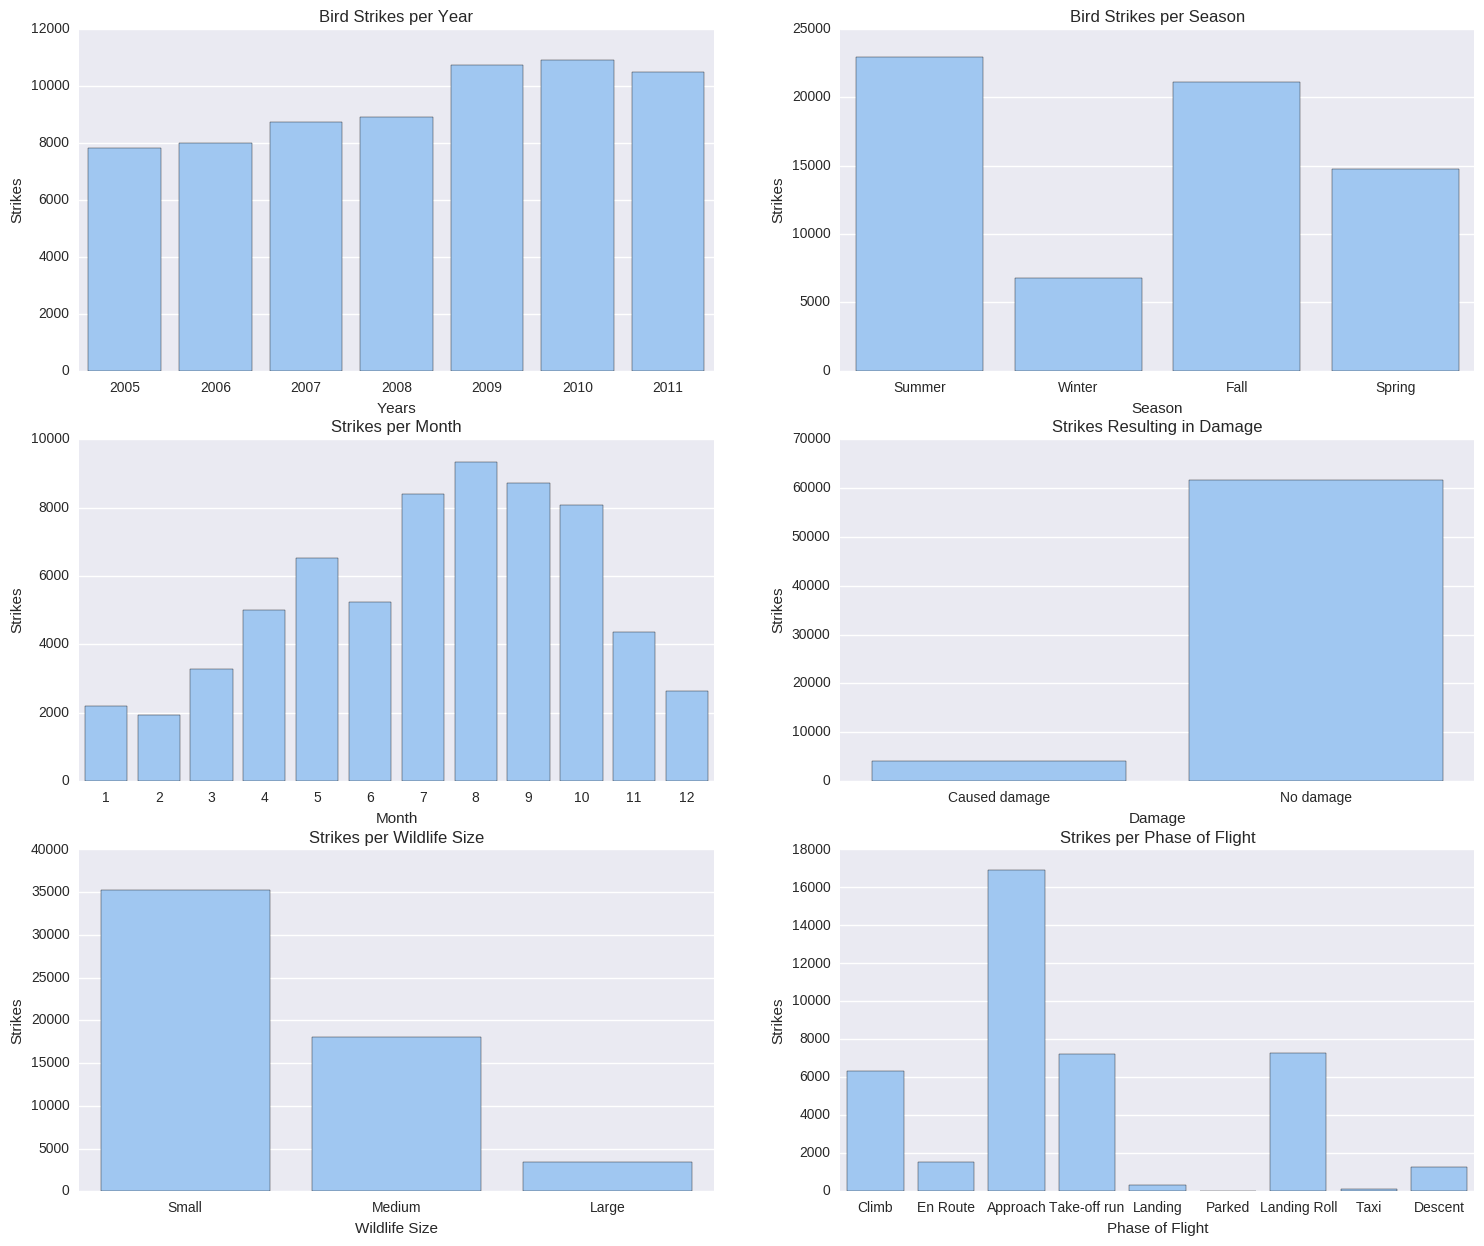

In [5]:

fig=plt.figure(figsize=(18,15))
ax1= fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
#Add seaborn styles to plots
sns.set(style='whitegrid')
sns.set_color_codes('pastel')

sns.barplot(x=years, y=strikes_years, color='b', ax=ax1)
ax1.set(ylabel='Strikes', xlabel='Years', title='Bird Strikes per Year')

sns.barplot(x=seasons, y=strikes_seasons, color='b', ax=ax2)
ax2.set(ylabel='Strikes', xlabel='Season', title='Bird Strikes per Season')

sns.barplot(x=tod, y=strikes_tod, color='b', ax=ax3)
ax3.set(ylabel='Strikes', xlabel='Month', title='Strikes per Month')

sns.barplot(x=damages, y=strikes_damage, color='b', ax=ax4)
ax4.set(ylabel='Strikes', xlabel='Damage', title='Strikes Resulting in Damage')

sns.barplot(x=size, y=strikes_size, color='b', ax=ax5)
ax5.set(ylabel='Strikes', xlabel='Wildlife Size', title='Strikes per Wildlife Size')

sns.barplot(x=phase, y=strikes_phase, color='b', ax=ax6)
ax6.set(ylabel='Strikes', xlabel='Phase of Flight', title='Strikes per Phase of Flight')

In [6]:
strikes_per_impact=Counter(bird_strikes['Effect: Impact to flight'])
impacts=list(strikes_per_impact.keys())
impact_strikes=list(strikes_per_impact.values())

strikes_per_damage=Counter(bird_strikes['Effect: Indicated Damage'])
damages=list(strikes_per_damage.keys())
damage_strikes=list(strikes_per_damage.values())

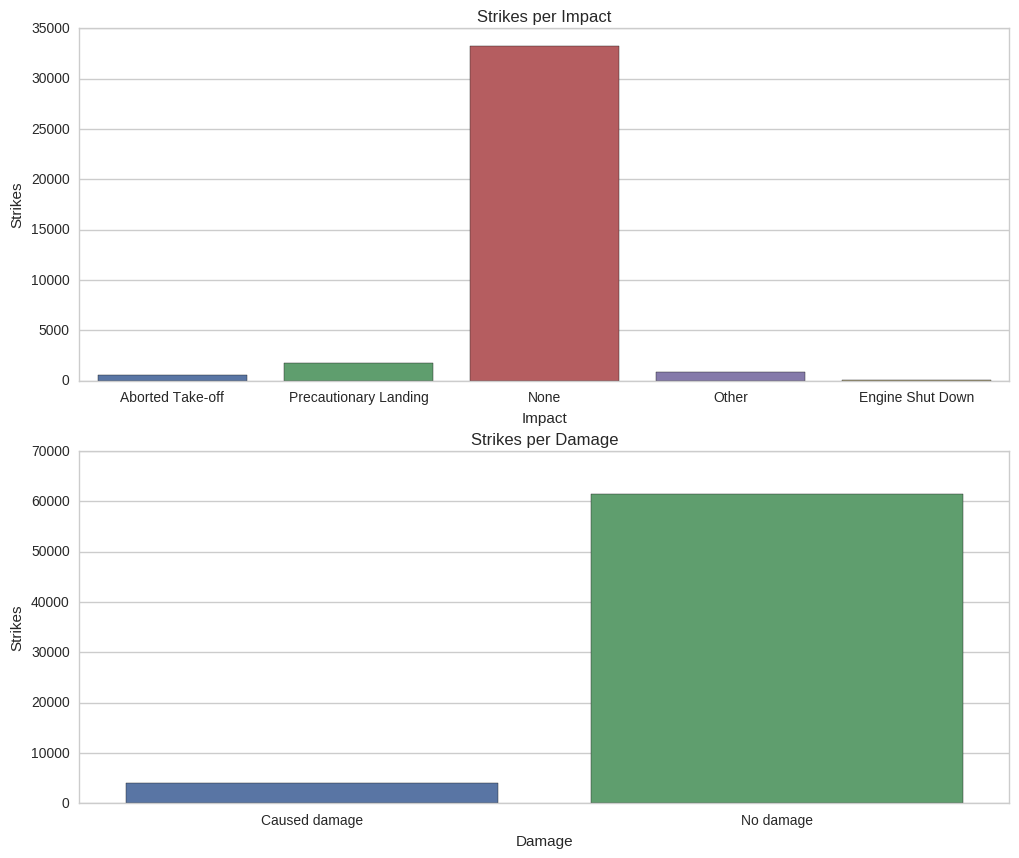

In [7]:
fig=plt.figure(figsize=(12,10))

ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)               

#lt.tight_layout()

sns.barplot(x=impacts, y=impact_strikes, ax=ax1)
ax1.set(ylabel='Strikes', xlabel='Impact', title='Strikes per Impact')
                        
sns.barplot(x=damages, y=damage_strikes, ax=ax2)
ax2.set(ylabel='Strikes', xlabel='Damage', title="Strikes per Damage")

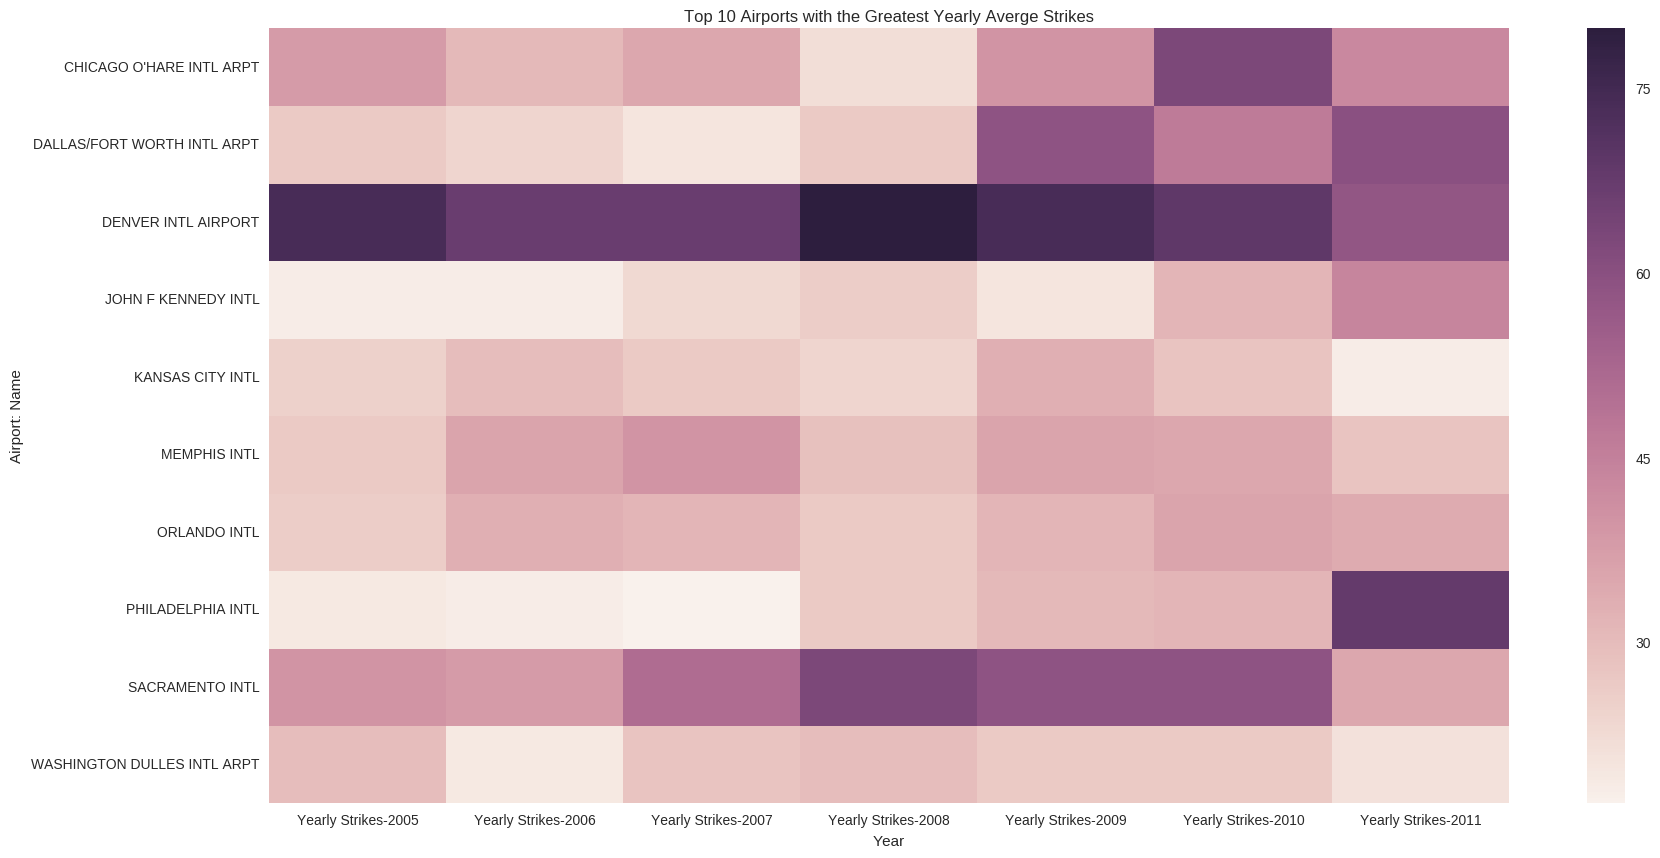

In [8]:
airport_yr_tot=bird_strikes.loc[bird_strikes['When: Phase of flight'].isin(['Climb', 'Take-off run', 'Parked', 'Taxi'])].groupby(
    ['Year', 'Airport: Name']).size().to_frame('Yearly Strikes')
airport_yr_tot.reset_index(level=[0,1], inplace=True)

airport_yr_avg=airport_yr_tot.groupby(['Airport: Name'])['Yearly Strikes'].mean().to_frame('Yearly Avg')
airport_yr_avg.reset_index(level=0, inplace=True)

airport_total=bird_strikes.loc[bird_strikes['When: Phase of flight'].isin(['Climb', 'Take-off run', 'Parked', 'Taxi'])].groupby(
    ['Airport: Name']).size().to_frame('Total Strikes')
airport_total.reset_index(level=[0,1], inplace=True)

airport=pd.merge(airport_yr_tot, airport_total, on='Airport: Name')
airport=pd.merge(airport, airport_yr_avg, on= 'Airport: Name')
airport=airport.sort_values('Yearly Avg', ascending=False).head(70)

fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(111)

sns.heatmap(airport.pivot_table(index='Airport: Name', columns='Year', values=['Yearly Strikes']), ax=ax1)
ax1.set(xlabel='Year', title='Top 10 Airports with the Greatest Yearly Averge Strikes')

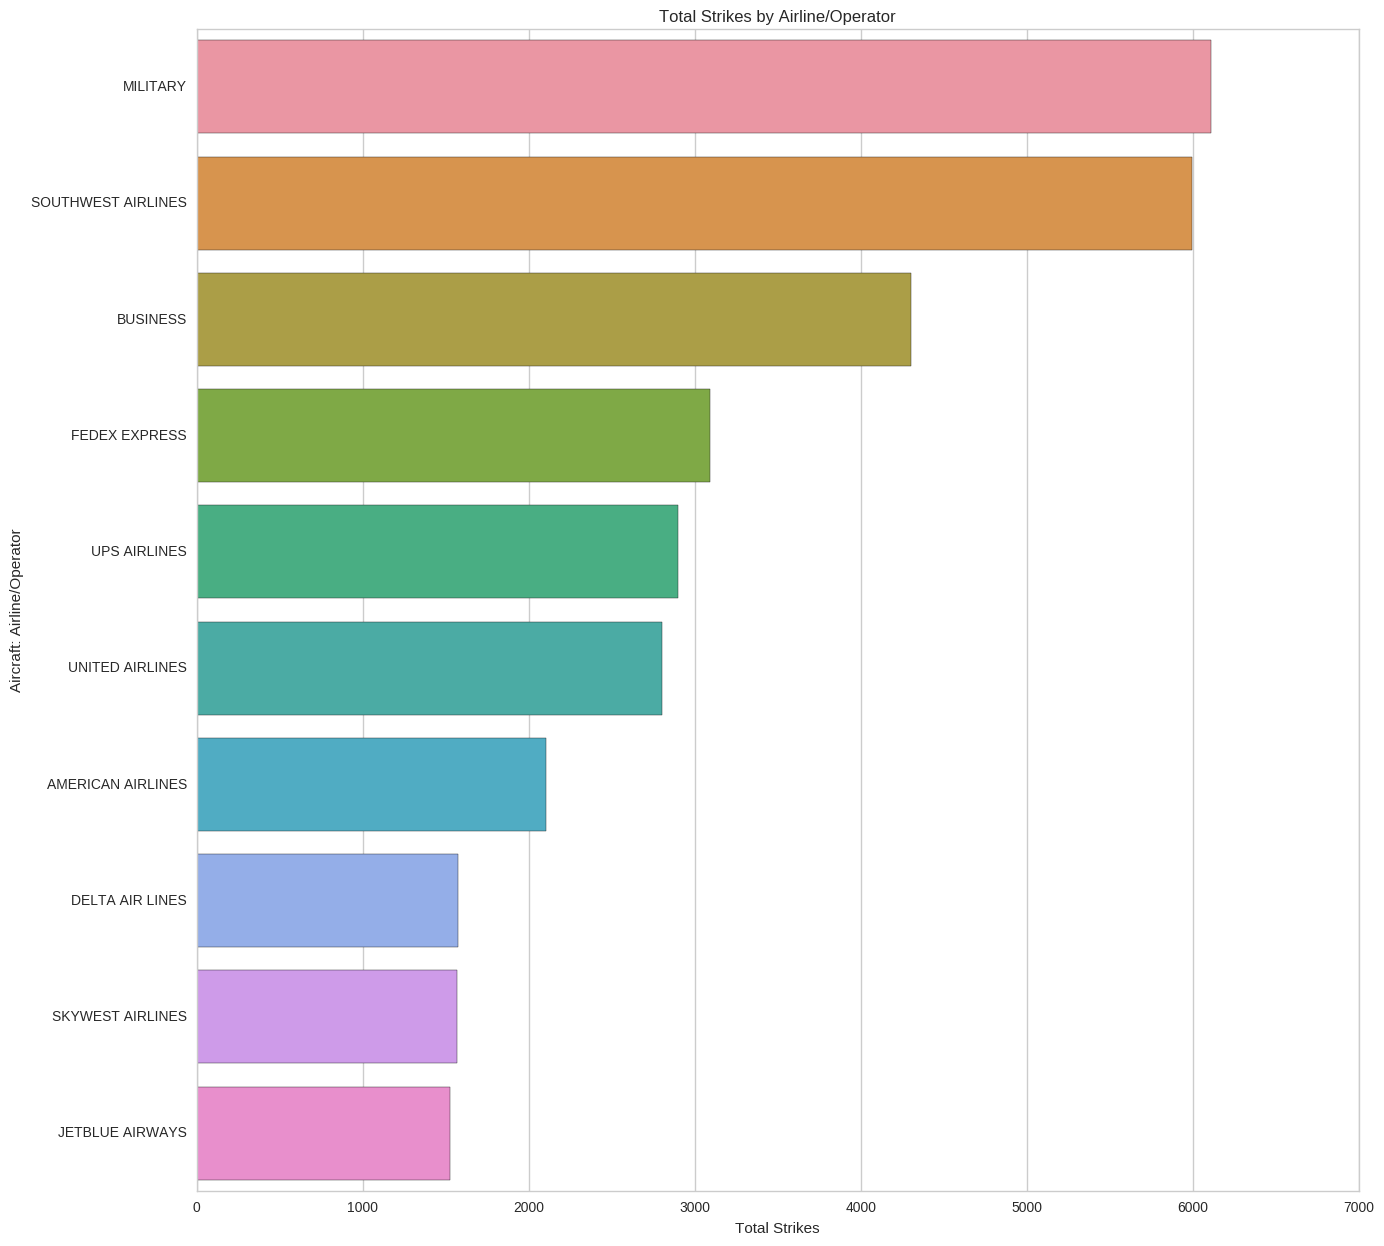

In [9]:
airline_strikes=bird_strikes.groupby(['Aircraft: Airline/Operator']).size().to_frame('Total Strikes')
airline_strikes.reset_index(level=0, inplace=True)

fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(111)
airline_strikes.sort_values(['Total Strikes'], inplace=True, ascending=False)
airline_strikes=airline_strikes.loc[airline_strikes['Aircraft: Airline/Operator'] != 'UNKNOWN'].head(10)
sns.barplot(x='Total Strikes', y='Aircraft: Airline/Operator', data=airline_strikes, ax=ax1)
ax1.set(xlabel='Total Strikes', title='Total Strikes by Airline/Operator')

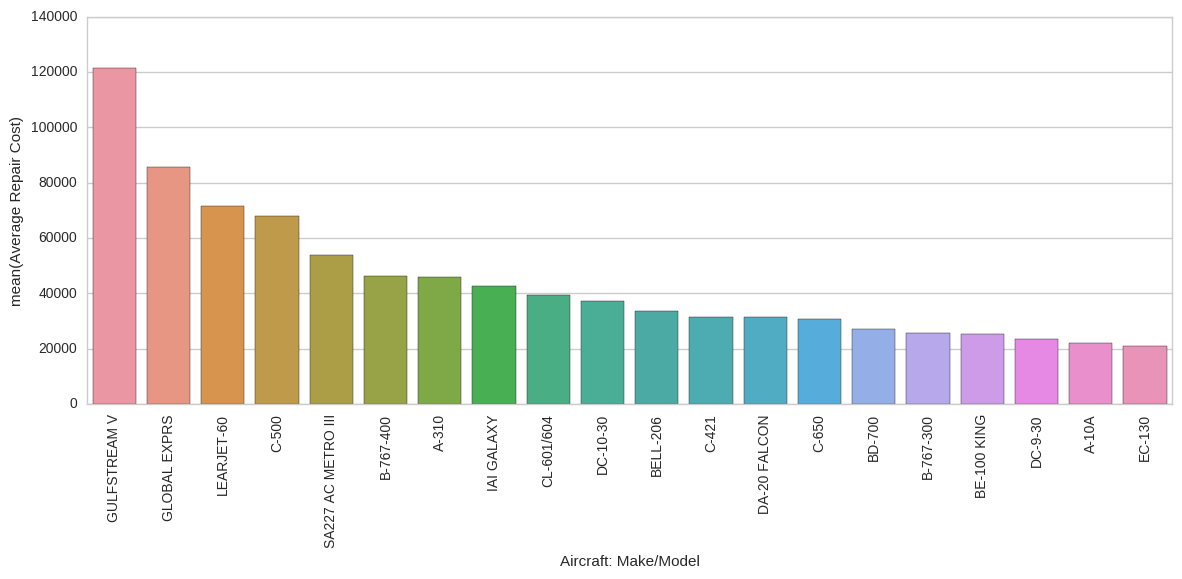

In [10]:
avgcost_byplane=bird_strikes.groupby(['Aircraft: Make/Model'])[
    'Cost: Repair (inflation adj)'].mean().to_frame('Average Repair Cost')
strikes_byplane=bird_strikes.groupby(['Aircraft: Make/Model']).size().to_frame('Total Strikes')

strikes_byplane.reset_index(level=0, inplace=True)
avgcost_byplane.reset_index(level=0, inplace=True)

byplane=pd.merge(strikes_byplane, avgcost_byplane, on='Aircraft: Make/Model')
byplane=byplane.sort_values('Average Repair Cost', ascending=False).loc[byplane['Total Strikes'] > 10].head(20)

fig=plt.figure(figsize=(14,5))
ax1=fig.add_subplot(111)
plt.xticks(rotation=90)
sns.barplot(byplane['Aircraft: Make/Model'], byplane['Average Repair Cost'])

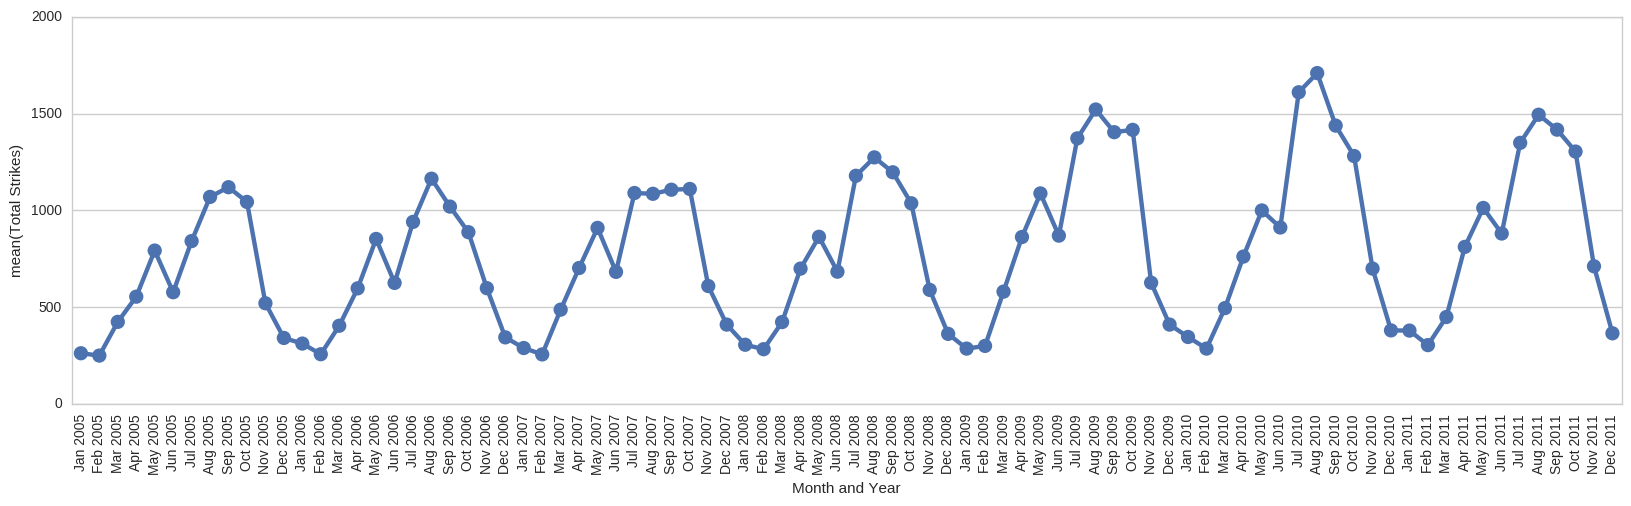

In [11]:
strikes_per_moyr=bird_strikes.groupby(['Month and Year', 'Year', 'Month']).size().to_frame('Total Strikes')
strikes_per_moyr.reset_index(level=[0,1,2], inplace=True)
strikes_per_moyr.sort_values(['Year', 'Month'], inplace=True)
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(111)
plt.xticks(rotation=90)
sns.pointplot(x='Month and Year', y='Total Strikes', data=strikes_per_moyr, ax=ax1)

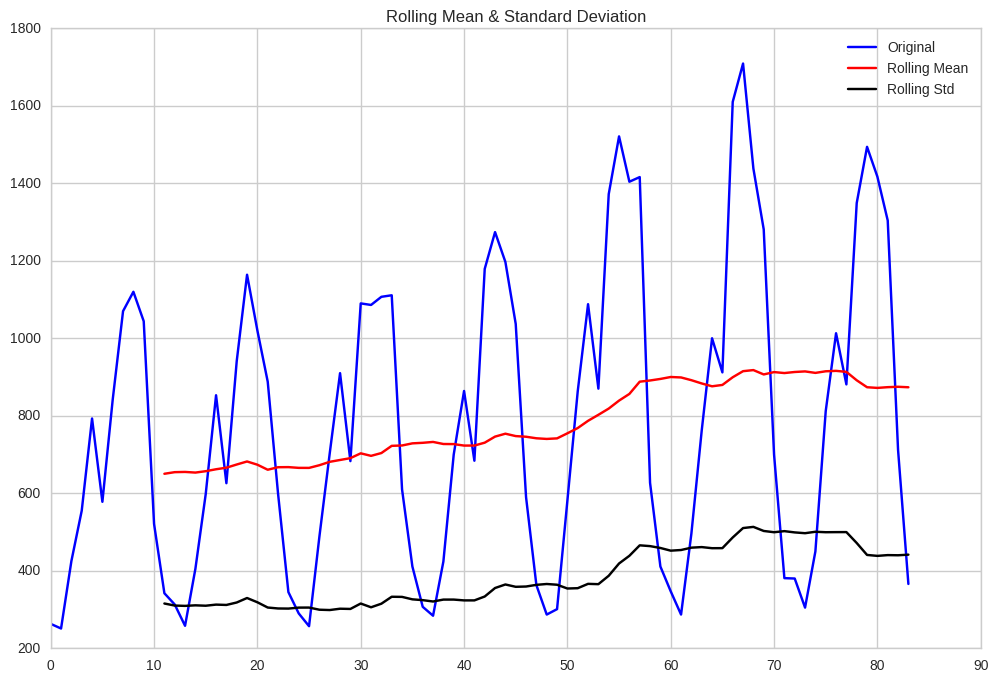

Results of Dickey-Fuller Test:
(84,)
Test Statistic                 -0.953727
p-value                         0.769765
#Lags Used                     12.000000
Number of Observations Used    71.000000
Critical Value (5%)            -2.903200
Critical Value (1%)            -3.526005
Critical Value (10%)           -2.588995
dtype: float64


In [12]:
strikes_per_moyr=strikes_per_moyr[['Month and Year', 'Total Strikes']]
strikes_per_moyr.reset_index(inplace=True)
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    print(timeseries.shape)
    dftest = adfuller(timeseries.values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(strikes_per_moyr['Total Strikes'])


The Dickey-Fuller Test shows the test statistic is greater than the critical value indicating the data is stationary

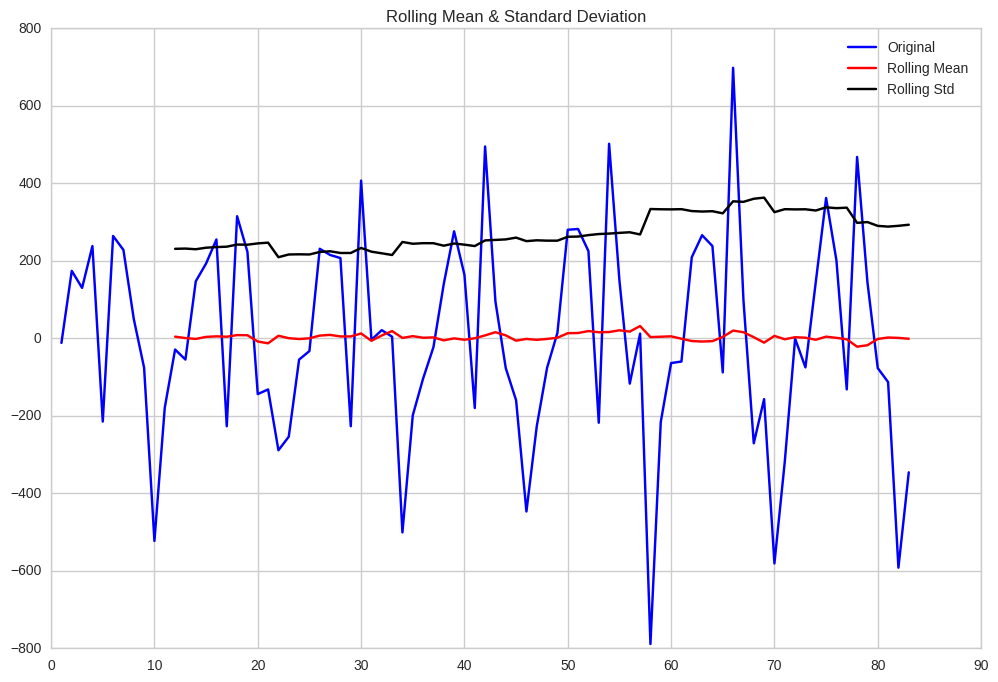

Results of Dickey-Fuller Test:
(83,)
Test Statistic                 -4.318867
p-value                         0.000412
#Lags Used                     11.000000
Number of Observations Used    71.000000
Critical Value (5%)            -2.903200
Critical Value (1%)            -3.526005
Critical Value (10%)           -2.588995
dtype: float64


In [13]:
 strikes_per_moyr["first_difference"]=strikes_per_moyr['Total Strikes']-strikes_per_moyr['Total Strikes'].shift(1)
 test_stationarity(strikes_per_moyr['first_difference'].dropna())

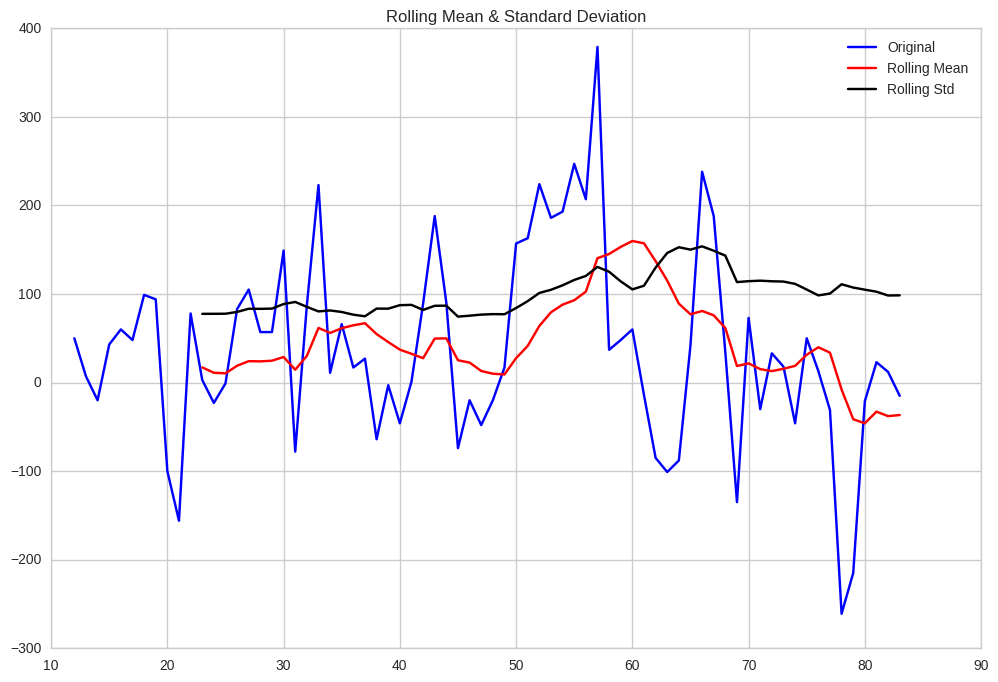

Results of Dickey-Fuller Test:
(72,)
Test Statistic                 -1.427111
p-value                         0.569212
#Lags Used                     12.000000
Number of Observations Used    59.000000
Critical Value (5%)            -2.911939
Critical Value (1%)            -3.546395
Critical Value (10%)           -2.593652
dtype: float64


In [14]:
 strikes_per_moyr["seasonal_difference"]=strikes_per_moyr['Total Strikes']-strikes_per_moyr['Total Strikes'].shift(12)
 test_stationarity(strikes_per_moyr['seasonal_difference'].dropna())

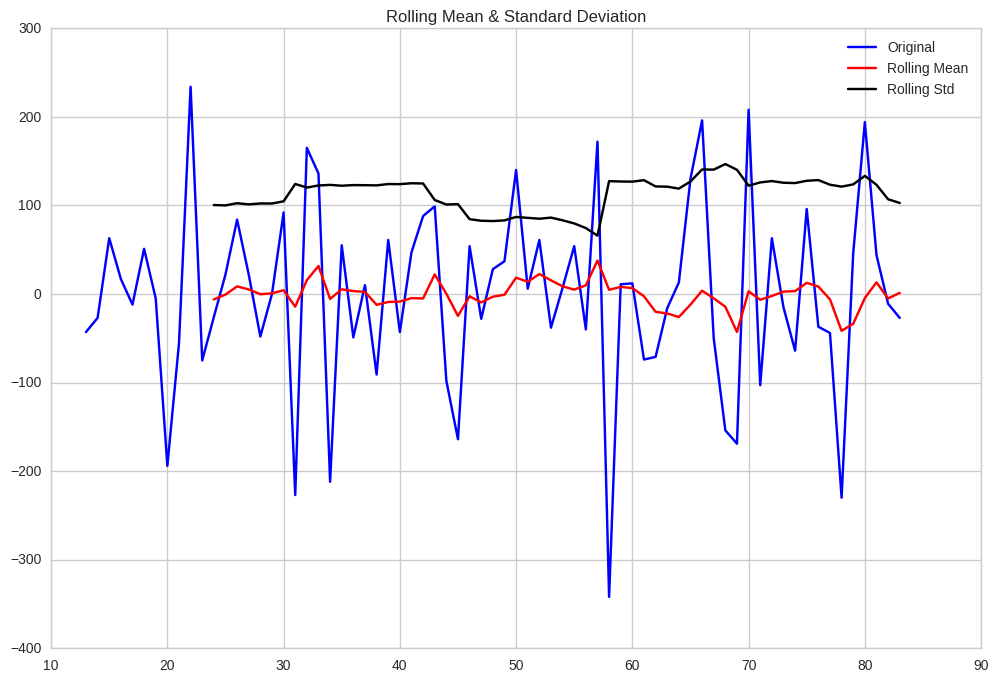

Results of Dickey-Fuller Test:
(71,)
Test Statistic                 -3.850470
p-value                         0.002431
#Lags Used                     11.000000
Number of Observations Used    59.000000
Critical Value (5%)            -2.911939
Critical Value (1%)            -3.546395
Critical Value (10%)           -2.593652
dtype: float64


In [15]:
 strikes_per_moyr["seasonal_first_difference"]=strikes_per_moyr['first_difference']-strikes_per_moyr['first_difference'].shift(12)
 test_stationarity(strikes_per_moyr['seasonal_first_difference'].dropna())

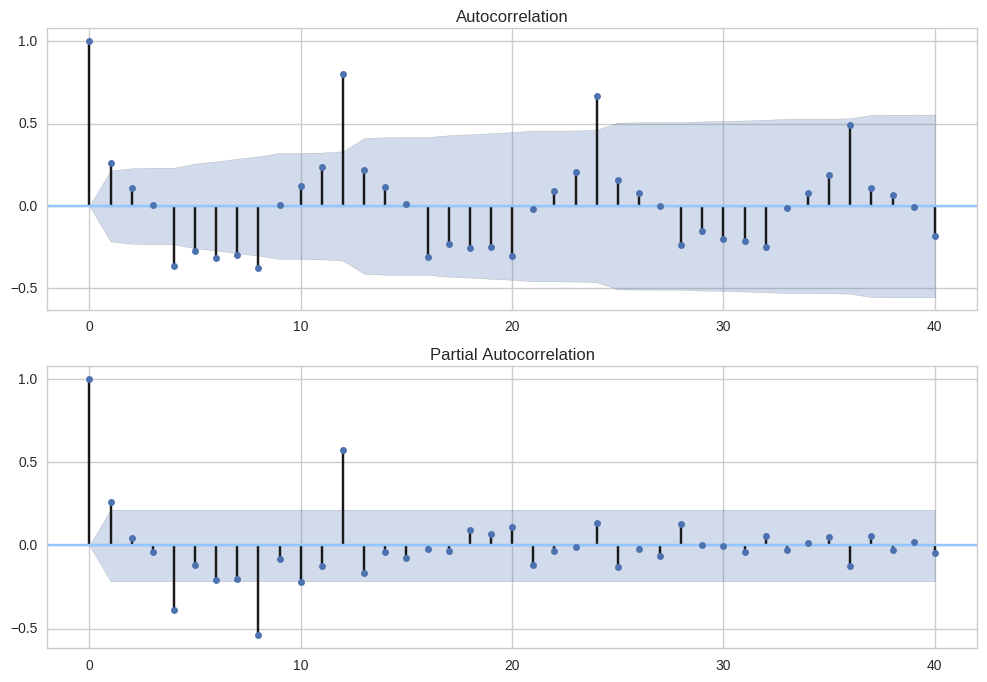

In [16]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(strikes_per_moyr.first_difference.iloc[1:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(strikes_per_moyr.first_difference.iloc[1:], lags=40, ax=ax2)

In [17]:
from pandas.tools.plotting import autocorrelation_plot

dta['TOTAL_STRIKES_2'] = dta[1:,:]

dta['TOTAL_STRIKES_2'] = (dta['TOTAL_STRIKES_2'] - dta['TOTAL_STRIKES_2'].mean()) / (dta['TOTAL_STRIKES_2'].std())
plt.acorr(dta['TOTAL_STRIKES_2'],maxlags = len(dta['TOTAL_STRIKES_2']) -1, linestyle = "solid", usevlines = False, marker='')
plt.show()
autocorrelation_plot(dta['Total Strikes'])
plt.show()

NameError: name 'dta' is not defined

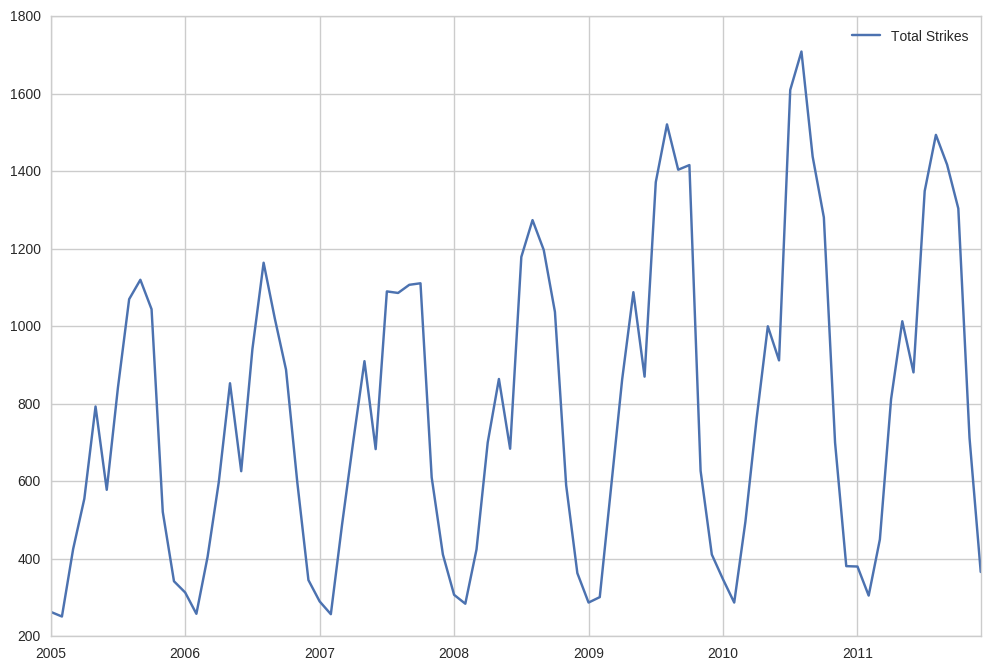

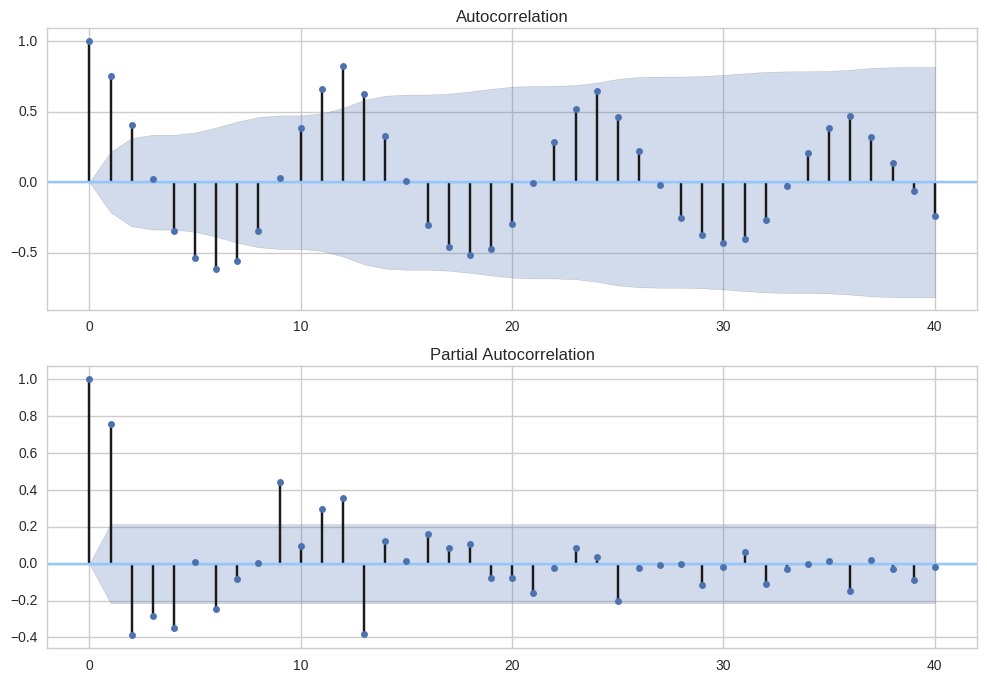

In [18]:
#mod = sm.tsa.statespace.SARIMAX(strikes_per_moyr['Total Strikes'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
#dates = sm.tsa.datetools.dates_from_range('2005m1', length=84)
#dta = pd.TimeSeries(strikes_per_moyr['Total Strikes'], index=dates)
#mod = sm.tsa.ARMA(dta, (2,2))
#results = mod.fit(trend='nc', disp=-1)
#print (results.summary())
dta= strikes_per_moyr[['Total Strikes']]
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2005m1', '2011m12'))

dta.plot(figsize=(12,8));
sm.stats.durbin_watson(dta)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


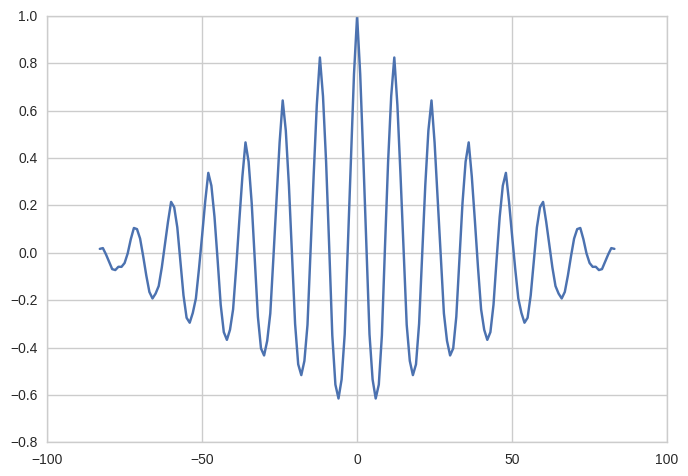

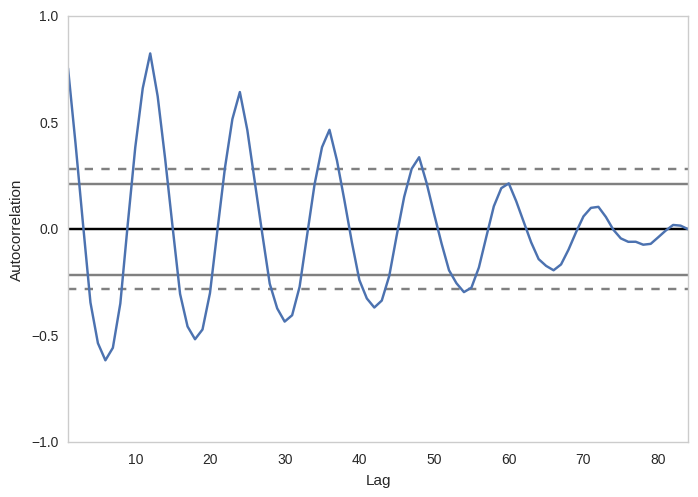

In [19]:
from pandas.tools.plotting import autocorrelation_plot

dta['TOTAL_STRIKES_2'] = dta[['Total Strikes']]

dta['TOTAL_STRIKES_2'] = (dta['TOTAL_STRIKES_2'] - dta['TOTAL_STRIKES_2'].mean()) / (dta['TOTAL_STRIKES_2'].std())
plt.acorr(dta['TOTAL_STRIKES_2'],maxlags = len(dta['TOTAL_STRIKES_2']) -1, linestyle = "solid", usevlines = False, marker='')
plt.show()
autocorrelation_plot(dta['Total Strikes'])
plt.show()

In [20]:
arma_mod20 = sm.tsa.ARMA(dta['Total Strikes'], (2,0)).fit()
print (arma_mod20.params)

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [21]:
strikes_per_moyr['forecast'] = results.predict(start = 102, end= 114, dynamic= True)  
strikes_per_moyr[['Total Strikes', 'forecast']].plot(figsize=(12, 8))

NameError: name 'results' is not defined

In [22]:
start = datetime.datetime.strptime("2005-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future = pd.DataFrame(index=date_list, columns= df.columns)
strikes_per_moyr = pd.concat([strikes_per_moyr, future])

NameError: name 'datetime' is not defined

In [23]:
strikes_per_moyr['forecast'] = results.predict(start = 114, end = 125, dynamic= True)  
strikes_per_moyr[['Total Strikes', 'forecast']].ix[-24:].plot(figsize=(12, 8)) 

NameError: name 'results' is not defined